In [1]:
import sympy as sp
from sympy import integrate, Symbol, diff, Eq, solve
import numpy as np
import seaborn as sns

In [2]:
# Define symbolic variable
x = Symbol('x', real=True, positive=True)
u = Symbol('u', real=True, positive=True)

In [3]:
# Define the CDF F(x)
F_x = sp.Rational(1, 4) * (x + 3*x**2)
F_x

3*x**2/4 + x/4

In [4]:
# Derive the PDF f(x)
f_x = diff(F_x, x)
f_x

3*x/2 + 1/4

In [5]:
# Verify that the total probability = 1
integral_f_x = integrate(f_x, (x, 0, 1))
print(f"Integral of f(x) from 0 to 1: {integral_f_x}")

Integral of f(x) from 0 to 1: 1


In [7]:
# Solve for the inverse CDF: F(x) = u
inverse_eq = Eq(F_x, u)
display(inverse_eq)
inverse_solution = solve(inverse_eq, x)
display(inverse_solution)

Eq(3*x**2/4 + x/4, u)

[sqrt(48*u + 1)/6 - 1/6]

In [8]:
# Choose the valid branch (non-negative)
inverse_cdf = inverse_solution[0]
print(f"Valid Inverse CDF: {inverse_cdf}")

Valid Inverse CDF: sqrt(48*u + 1)/6 - 1/6


In [9]:
def get_inverse_cdf(F_x):
    x = Symbol('x', real=True, positive=True)
    u = Symbol('u', real=True, positive=True)
    inverse_eq = Eq(F_x, u)
    inverse_solution = solve(inverse_eq, x)
    inverse_cdf = inverse_solution[0]
    return inverse_cdf

In [10]:
get_inverse_cdf(F_x)

sqrt(48*u + 1)/6 - 1/6

In [11]:
# Convert to a Python function for sampling
inverse_cdf_func = sp.lambdify(u, inverse_cdf, 'numpy')

In [12]:
f = sp.lambdify(x, f_x, 'numpy')
F = sp.lambdify(x, F_x, 'numpy')

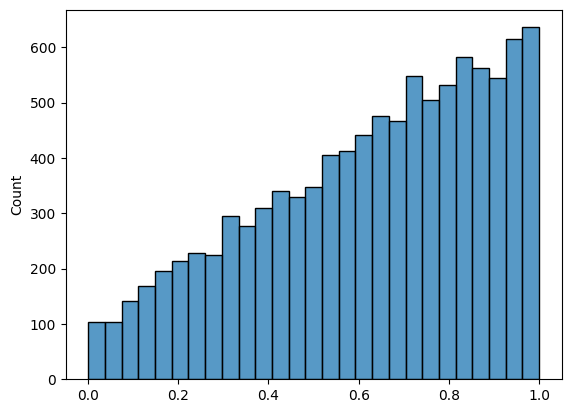

In [13]:
def generate_rv_inverse_transform(size=10000,inverse_cdf_func = inverse_cdf_func):
    U_samples = np.random.rand(size)
    X_samples = inverse_cdf_func(U_samples)
    return X_samples

rs = generate_rv_inverse_transform()
sns.histplot(rs);

In [14]:
#upper bound of f(x)
c = sp.N(max(f_x.subs(x, val) for val in [0, 1] + sp.solve(sp.diff(f_x, x))))
c

1.75000000000000

In [15]:
# --- Acceptance-Rejection Method ---
def generate_rv_acceptance_rejection(size=10000, c = 3.5, f_x = f_x):

    samples = np.empty(size)
    count = 0
    while count < size:
        Y = np.random.rand()
        U = np.random.rand()
        if U <= f(Y) / c:
            samples[count] = Y
            count += 1
    return samples



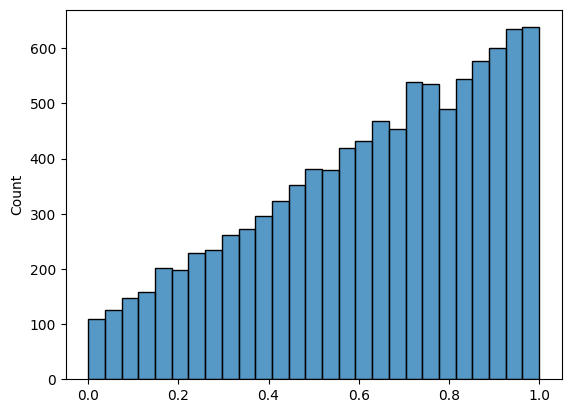

In [16]:
rs = generate_rv_acceptance_rejection(size = 10000, c = c)
sns.histplot(rs);

In [17]:
import numpy as np

def generate_rv_composition_general(size=1, weights=None, inverse_cdfs=None):
    """
    Generates random variables using the Composition Method for a general mixture.

    Parameters:
    - size: number of samples
    - weights: list of probabilities for each component, must sum to 1
    - inverse_cdfs: list of functions, each implementing the inverse CDF of a component

    Returns:
    - samples: numpy array of generated samples
    """
    if weights is None or inverse_cdfs is None:
        raise ValueError("weights and inverse_cdfs must be provided")

    if len(weights) != len(inverse_cdfs):
        raise ValueError("weights and inverse_cdfs must have the same length")

    weights = np.array(weights)
    if not np.isclose(weights.sum(), 1):
        raise ValueError("weights must sum to 1")

    samples = np.empty(size)

    # Step 1: select component for each sample
    U_choice = np.random.rand(size)
    cum_weights = np.cumsum(weights)

    # Step 2: generate uniform random variables for inverse transform
    U_rv = np.random.rand(size)

    # Step 3: assign samples according to chosen component
    for i, (cw, inv_cdf) in enumerate(zip(cum_weights, inverse_cdfs)):
        if i == 0:
            mask = U_choice <= cw
        else:
            mask = (U_choice > cum_weights[i-1]) & (U_choice <= cw)
        samples[mask] = inv_cdf(U_rv[mask])

    return samples


In [18]:
F_x

3*x**2/4 + x/4

In [19]:
get_inverse_cdf(x)

u

In [20]:
get_inverse_cdf(x**2)

sqrt(u)

In [21]:
weights = [0.25, 0.75]
inverse_cdfs=[sp.lambdify(u,get_inverse_cdf(x),'numpy'), sp.lambdify(u,get_inverse_cdf(x**2),'numpy')]


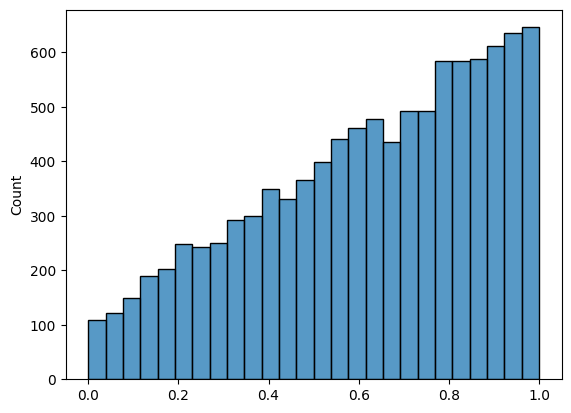

In [22]:
# Generate 10,000 samples
rs = generate_rv_composition_general(
    size=10000,
    weights=weights,
    inverse_cdfs = inverse_cdfs
)

sns.histplot(rs);



In [23]:
f_x = sp.Rational(1, 2) + x**3 + sp.Rational(6, 4)*x**5
F_x = integrate(f_x, (x, 0, x))
f = sp.lambdify(x, f_x, 'numpy')
F = sp.lambdify(x, F_x, 'numpy')
display(f_x,F_x)

3*x**5/2 + x**3 + 1/2

x**6/4 + x**4/4 + x/2

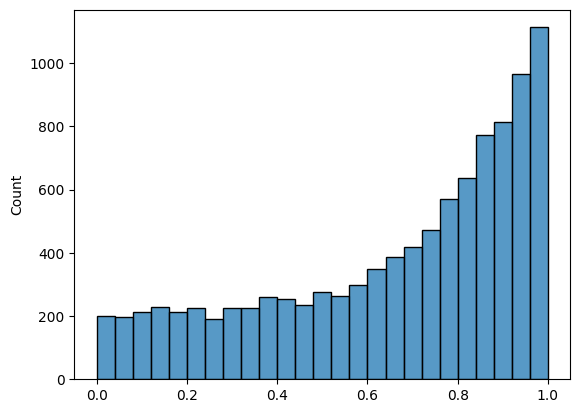

In [24]:
c = sp.N(max(f_x.subs(x, val) for val in [0, 1] + sp.solve(sp.diff(f_x, x))))
rs = generate_rv_acceptance_rejection(size = 10000, c = c)
sns.histplot(rs);

In [25]:
F_x

x**6/4 + x**4/4 + x/2

In [26]:
get_inverse_cdf(x**6)

u**(1/6)

In [27]:
get_inverse_cdf(x**4)

u**(1/4)

In [28]:
get_inverse_cdf(x)

u

In [29]:
weights = [.25,.25, .5]


In [30]:
inverse_cdfs=[sp.lambdify(u,get_inverse_cdf(x**6),'numpy'), sp.lambdify(u,get_inverse_cdf(x**4),'numpy'),sp.lambdify(u,get_inverse_cdf(x),'numpy')]


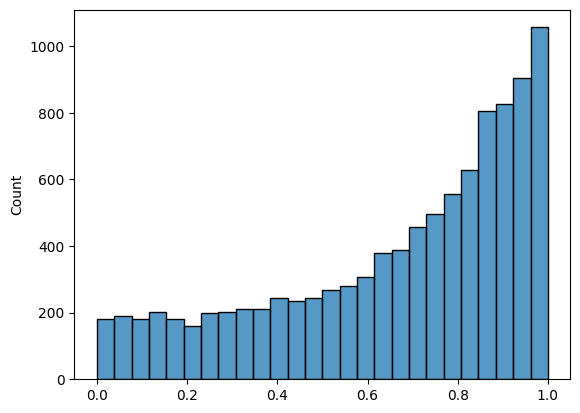

In [31]:
# Generate samples
rs = generate_rv_composition_general(
    size=10000,
    weights=weights,
    inverse_cdfs=inverse_cdfs
)

sns.histplot(rs);

In [36]:
inverse_eq = Eq(F_x, u)
inverse_solution = solve(inverse_eq, x)
display(inverse_eq, inverse_solution)

Eq(x**6/4 + x**4/4 + x/2, u)

[]

In [37]:
# Numerical inverse CDF function
inverse_F = lambda u_val: float(sp.nsolve(F_x - u_val, x, 0.5))  # start guess = 0.5
inverse_F

<function __main__.<lambda>(u_val)>

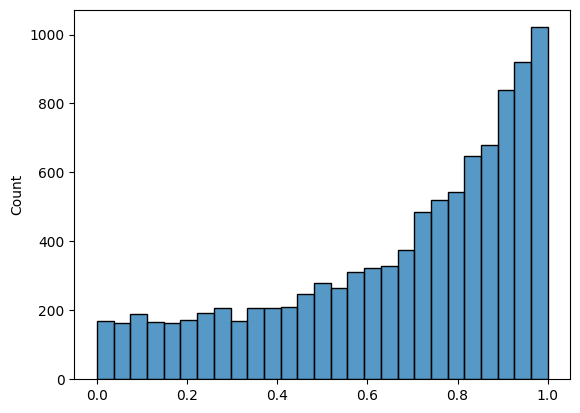

In [38]:
U = np.random.rand(10000)
rs = np.array([inverse_F(u) for u in U])
sns.histplot(rs);